# An initial training pipeline

In [3]:
%load_ext dotenv
%dotenv
import os
import sys
SRC_DIR = os.path.join('../', os.getenv('SRC_DIR'))
sys.path.append(SRC_DIR)
import dask.dataframe as dd
import pandas as pd
import numpy as np

from glob import glob
ft_dir = os.path.join('../', os.getenv('FEATURES_DATA'))
ft_files_path = glob(ft_dir+'/*.parquet')

c:\Users\Igor\.conda\envs\dsi_participant\lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
C:\Users\Igor\AppData\Local\Temp\ipykernel_9112\1206650192.py:7: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can be repor

In [4]:
df = dd.read_parquet(ft_files_path).compute().reset_index().dropna()

In [5]:
df

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
0,OXY,2000-01-03,10.269221,10.388979,9.939887,9.969827,5.047810,1161303,Energy,Oil & Gas Exploration & Production,2000,91.111641,-0.890576,0,0.0
1,OXY,2000-01-04,9.790190,10.059645,9.730311,9.760251,4.941702,1576308,Energy,Oil & Gas Exploration & Production,2000,9.969827,-0.021021,0,1.0
2,OXY,2000-01-05,9.760251,9.909948,9.670432,9.820130,4.972020,1172159,Energy,Oil & Gas Exploration & Production,2000,9.760251,0.006135,1,1.0
3,OXY,2000-01-06,9.730311,10.269221,9.700372,10.089584,5.108444,3336738,Energy,Oil & Gas Exploration & Production,2000,9.820130,0.027439,1,1.0
4,OXY,2000-01-07,10.329100,10.778191,10.209342,10.388979,5.260030,3325674,Energy,Oil & Gas Exploration & Production,2000,10.089584,0.029674,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747821,INTU,2024-06-26,628.000000,638.650024,624.489990,637.479980,637.479980,1169600,Information Technology,Application Software,2024,630.469971,0.011119,1,1.0
2747822,INTU,2024-06-27,639.080017,657.159973,635.510010,651.440002,651.440002,1478000,Information Technology,Application Software,2024,637.479980,0.021899,1,1.0
2747823,INTU,2024-06-28,652.000000,662.510010,647.979980,657.210022,657.210022,1754000,Information Technology,Application Software,2024,651.440002,0.008857,1,0.0
2747824,INTU,2024-07-01,652.510010,653.130005,642.479980,650.770020,650.770020,1195000,Information Technology,Application Software,2024,657.210022,-0.009799,0,1.0


## Preprocessing

+ Previously, we produced a features data set.
+ Most times, one or more [preprocessing steps](https://scikit-learn.org/stable/modules/preprocessing.html#) steps will be applied to data.
+ The most practical way to apply them is by arranging them in `Pipeline` objects, wchich are sequential transformations applied to data. 
+ It is convenient for us to label these transformations and there is a standard way of doing so.


## Transformations

+ Transformations are classes that implement `fit` and `transform` methods.

### StandardScaler

+ For example, transform a numerical variable by standardizing it.
- Standardization is removing the mean value of the feature and scale it by dividing non-constant features by their standard deviation.

$$
z = \frac{x-\mu}{\sigma}
$$


+  Using [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), one can do the following:

In [11]:
returns = df[['returns']].dropna()
returns.describe()

,returns
count,2.746829e+06
mean,4.605007e-03
std,4.042734e-01
min,-9.982646e-01
25%,-9.174380e-03
50%,4.866117e-04
75%,1.019698e-02
max,4.066612e+02


In [14]:
# Create a StandardScaler object

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

# Fit the StandardScaler object with the returns data
std_scaler.fit(returns)

StandardScaler()

In [22]:
# Transform the returns data using the fitted scaler

scaled_returns_np = std_scaler.transform(returns)
scaled_returns = pd.DataFrame(scaled_returns_np, columns=returns.columns)
scaled_returns.describe()

,returns
count,2.746829e+06
mean,1.272693e-18
std,1.000000e+00
min,-2.480672e+00
25%,-3.408433e-02
50%,-1.018716e-02
75%,1.383217e-02
max,1.005895e+03


###  OneHotEncoder

+ Categorical features can be encoded as numerical values using `OneHotEncoder`.

<Axes: xlabel='sector'>

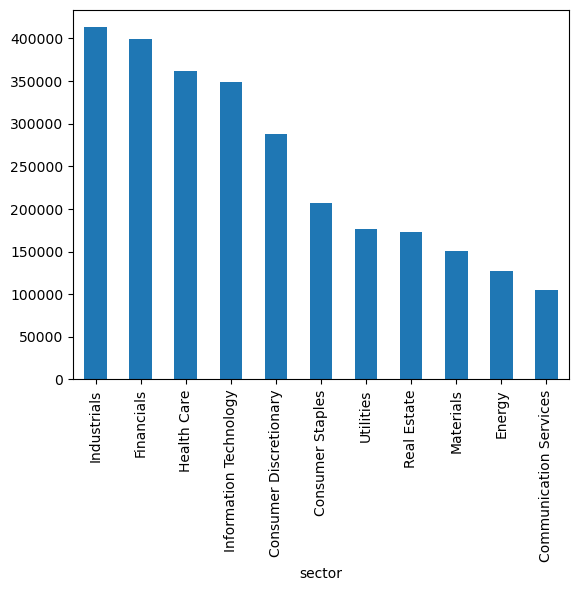

In [25]:
df['sector'].value_counts().plot(kind='bar')

+ Use [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to encode a categorical variable as numerical.
+ Important parameters:

    - `categories` allows you to specify the categories to work with.
    - `drop`: we can drop the `'first'` value (dummy encoding) or `'if_binary'`, a convenience setting for binary values.
    - `handle_unknown` allows three options, `'error'`, `'ignore'`, and `'infrequent_if_exist'`, depending on what we want to do with new values.

In [31]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
onehot.fit(df[['sector']])

sector_enc = onehot.transform(df[['sector']])
sector_enc.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
sect_enc_df = pd.DataFrame(sector_enc.toarray())
sect_enc_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2746824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2746825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2746826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2746827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Pipelines

+ It is impractical and costly to manipulate data "by hand". 
+ To manage data preprocessing steps within the cross-validation process use `Pipeline` objects.
+ A [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object allows us to sequentially apply transformation steps and, if required, a predictor.
+ `Pipeline` objects compose transforms, i.e., classes that implement `transform` and `fit` methods.
+ The purpose of `Pipeline` objects is to ensemble transforms and predictors to be used in cross-validation.
+ A `Pipeline` is defined by a list of tuples.
+ Each tuple is composed of `("name", <ColumnTransformer>)`, the name of the step and the `<ColumnTransformer>` function of our chosing.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, cohen_kappa_score, f1_score


In [35]:
tickers_pipe = Pipeline(
    [
        ('one_hot', OneHotEncoder(handle_unknown='ignore')),
        ('DTC', DecisionTreeClassifier(criterion='entropy', max_depth=3))
    ]
)
tickers_pipe

Pipeline(steps=[('one_hot', OneHotEncoder(handle_unknown='ignore')),
                ('DTC',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3))])

In [68]:
x0 = df[['sector']]
y0 = df['target']
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size=0.15, random_state=0 )

tickers_pipe.fit(x0_train, y0_train)

Pipeline(steps=[('one_hot', OneHotEncoder(handle_unknown='ignore')),
                ('DTC',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3))])

In [69]:
y_pred_train = tickers_pipe.predict(x0_train)
y_pred_test = tickers_pipe.predict(x0_test)

y_proba_train = tickers_pipe.predict_proba(x0_train)
y_proba_test = tickers_pipe.predict_proba(x0_test)

In [70]:
res = {
    'accuracy_score_train': accuracy_score( y0_train, y_pred_train ),
    'accuracy_score_test': accuracy_score( y0_test, y_pred_test ),
    'cohen_kappa_train': cohen_kappa_score( y0_train, y_pred_train ),
    'cohen_kappa_test': cohen_kappa_score( y0_test, y_pred_test ),
    'log_loss_train': log_loss( y0_train, y_proba_train ),
    'log_loss_test': log_loss( y0_test, y_proba_test ),
    'f1_score_train': f1_score( y0_train, y_pred_train ),
    'f1_score_test': f1_score( y0_test, y_pred_test )
}

res

{'accuracy_score_train': 0.5113337136650442,
 'accuracy_score_test': 0.5110369516412839,
 'cohen_kappa_train': 0.0,
 'cohen_kappa_test': 0.0,
 'log_loss_train': 0.6928773860808164,
 'log_loss_test': 0.6928797549209604,
 'f1_score_train': 0.6766655293158779,
 'f1_score_test': 0.6764056313595734}

+ The model does not show great performance, but the pipeline shows results. 
+ Below, we expand the pipeline to include more variables, and further we will work with more robust model selection pipelines.

## ColumnTransformer

+ Use [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to apply transformers to specific columns of a DataFrame.
+ In this case, we will scale numeric variables and apply one-hot encoding to categorical columns.

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [8]:
transf = ColumnTransformer(
    transformers = [
        ('num_norm', StandardScaler(), ['returns', 'Volume']),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['sector'])
    ], remainder='drop'
)

tickers_transf_pipe = Pipeline(
    [
        ('preproc', transf),
        ('model', DecisionTreeClassifier(criterion='entropy', max_depth=3))
    ]
)

# Model Selection

The model selection process is an iterative process in which :

+ Select schema and load data.
+ Define a pipeline and its (hyper) parameters.

    - Use ColumnTransformers to transform numeric and cateogrical variables.
    - Hyperparameters can be defined independently of code. 

+ Implement a splitting strategy. 

    - Use [cross_validate]() to select several metrics and operational details.

+ Measure performance.

    - [Select metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

+ Repeat

## Training, Validation, Testing Split

+ The first spliting strategy is to use a training, validation, and test set.
+ Training set will be used to fit the model.
+ Validation set is used to evaluate hyperparameter choice.
+ Testing set is used to evaluate performance on data the model has not yet seen.
+ In this case we want to compare two models: 

    - Decision Tree with 3 minumum samples per leaf.
    - Decision Tree with 10 minimum samples per leaf.

![](../images/03b_train_validate_test.png)

## Setting parameters in pipeline steps

+ One can obtain the parameters of a pipeline with `pipe.get_params()`.
+ We can set any parameter of a pipeline with `pipe.set_parames(**kwargs)`. 
+ The input `**kwargs` is a dictionary of the params to be modified. Params of the steps are labeled with the name of the step followed by `__` and the name of the parameter.

+ There are a few steps that we will repeat: 

    - Fit the candidate model on training data.
    - Predict on training and test data.
    - Compute training and test performance metrics.
    - Return.

+ We encapsulate this procedure in a function. 

In [1]:
def evaluate_model(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    Y_pred_train = clf.predict(X_train)
    Y_pred_test = clf.predict(X_test)
    Y_proba_train = clf.predict_proba(X_train)
    Y_proba_test = clf.predict_proba(X_test)
    performance_metrics = {
        'log_loss_train': log_loss(Y_train, Y_proba_train),
        'log_loss_test': log_loss(Y_test, Y_proba_test),
        'cohen_kappa_train': cohen_kappa_score(Y_train, Y_pred_train),
        'cohen_kappa_test': cohen_kappa_score(Y_test, Y_pred_test),
        'f1_score_train': f1_score(Y_train, Y_pred_train),
        'f1_score_test': f1_score(Y_test, Y_pred_test),
        'accuracy_score_train': accuracy_score(Y_train, Y_pred_train),
        'accuracy_score_test': accuracy_score(Y_test, Y_pred_test),
    }
    return performance_metrics

In [9]:
# Schema
X = df[['returns','Volume','sector']]
Y = df['target']

# Split the data
X_rest, X_test, Y_rest, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_rest, Y_rest, test_size=0.2, random_state=0)


In [16]:
# Evaluate hyperparameter configuration 2
pipe_d3 = tickers_transf_pipe.set_params(**{'model__max_depth':3})
res_d3 = evaluate_model(pipe_d3, X_train, Y_train, X_valid, Y_valid)
res_d3

{'log_loss_train': 0.692368970310519,
 'log_loss_test': 0.6923221112164396,
 'cohen_kappa_train': 0.017352546771608246,
 'cohen_kappa_test': 0.01717551986528143,
 'f1_score_train': 0.6309557528716069,
 'f1_score_test': 0.6320182934001232,
 'accuracy_score_train': 0.515282968423807,
 'accuracy_score_test': 0.5159376827389742}

In [12]:
# Evaluate hyperparameter configuration 2
pipe_d15 = tickers_transf_pipe.set_params(**{'model__max_depth':15})
res_15 = evaluate_model(pipe_d15, X_train, Y_train, X_valid, Y_valid)

In [13]:
res_15

{'log_loss_train': 0.6891943816888142,
 'log_loss_test': 0.7451037088584366,
 'cohen_kappa_train': 0.025595731003447364,
 'cohen_kappa_test': 0.015545472985562525,
 'f1_score_train': 0.6433057418007491,
 'f1_score_test': 0.6405317320997437,
 'accuracy_score_train': 0.5200452794985125,
 'accuracy_score_test': 0.515894451106161}

## Cross-Validation

+ Cross-validation is a resampling method.
+ It is an iterative method applied to training data.
+ Training data is divided into folds.
+ Each fold is used once as a validation set and the rest of the folds are used for training.
+ Test data is used for final evaluation.

From [Scikit's Documentation ](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance), the diagram below shows the data divisions and folds during the cross-validation process.

![](../images/03b_grid_search_cross_validation.png)

There are two functions that can be used for [calculating cross-validation performance scores](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance): `cross_val_score()` and `cross_validate()`. The first function, [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score), is a convenience function to get quick perfromance calculations. We will discuss `cross_validate()` as it offers advantages over `cross_val_score()`.

## Obtaining metrics

+ Use [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) to measure one or more performance metrics and operational details.
+ There are two advantages of using this function. From [Scikit's documentation](https://scikit-learn.org/stable/modules/cross_validation.html#the-cross-validate-function-and-multiple-metric-evaluation):

>- It allows specifying multiple metrics for evaluation.
>- It returns a dict containing fit-times, score-times (and optionally training scores, fitted estimators, train-test split indices) in addition to the test score.


In [17]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc', 'neg_log_loss', 'neg_brier_score']
d3_perf_metr_dict = cross_validate(pipe_d3, X, Y, cv=5, scoring=scoring, return_train_score=True)

In DataFrame form:

In [18]:
pd.DataFrame(d3_perf_metr_dict)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc,test_neg_log_loss,train_neg_log_loss,test_neg_brier_score,train_neg_brier_score
0,5.251859,1.620841,0.514954,0.515084,0.653315,0.653312,0.514780,0.514860,0.893871,0.893617,0.511201,0.512581,-0.692638,-0.692307,-0.249745,-0.249603
1,5.530209,1.719544,0.517160,0.514846,0.650986,0.650315,0.516310,0.514916,0.880716,0.882326,0.514228,0.512646,-0.692506,-0.692585,-0.249679,-0.249719
2,6.006967,1.846046,0.513971,0.515693,0.634611,0.637093,0.515424,0.516388,0.825502,0.831442,0.509790,0.512792,-0.692705,-0.692263,-0.249779,-0.249581
3,5.770030,1.792692,0.513450,0.514287,0.666511,0.668108,0.513053,0.513430,0.950948,0.956164,0.509932,0.510919,-0.693354,-0.692308,-0.249769,-0.249604
4,5.531175,1.479753,0.514312,0.515507,0.636035,0.633352,0.515550,0.516538,0.830008,0.818438,0.512057,0.512252,-0.692609,-0.692287,-0.249731,-0.249593


In [19]:
d15_perf_metr_dict = cross_validate(pipe_d15, X, Y, cv=6, scoring=scoring, return_train_score=True)
pd.DataFrame(d15_perf_metr_dict)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc,test_neg_log_loss,train_neg_log_loss,test_neg_brier_score,train_neg_brier_score
0,5.722137,1.425830,0.514772,0.515206,0.651284,0.651660,0.514803,0.515047,0.886235,0.886905,0.510762,0.512644,-0.692659,-0.692315,-0.249756,-0.249606
1,5.686106,1.307724,0.518013,0.514592,0.623852,0.623806,0.519026,0.516611,0.781737,0.787134,0.516308,0.511710,-0.692260,-0.692598,-0.249558,-0.249725
2,5.650801,1.292028,0.514824,0.515488,0.636478,0.637297,0.515858,0.516237,0.830722,0.832529,0.510422,0.512561,-0.692653,-0.692289,-0.249753,-0.249593
3,5.552864,1.331255,0.512301,0.514992,0.610379,0.612511,0.515930,0.517749,0.747158,0.749733,0.509616,0.512777,-0.692731,-0.692282,-0.249791,-0.249589
4,5.651922,1.286843,0.515080,0.515174,0.650372,0.651181,0.515057,0.515060,0.882121,0.885099,0.512213,0.512341,-0.693419,-0.692324,-0.249735,-0.249611
5,5.642641,1.267740,0.514471,0.515367,0.636456,0.633375,0.515626,0.516442,0.831247,0.818759,0.512949,0.511992,-0.692588,-0.692321,-0.249720,-0.249609


# About Performance

+ Notice that in order to acquire information about our model and continue development, we are spending resources: time, electricity, equipment use, etc. As well, we are generating data and binary objects that implement our models (fitted `Pipeline` objects, for example).
+ For certain applications, operating performance (latency or `'score_time'`) may be as important or more important than predictive performance metrics. 
+ Every experiment throws important information and we can log them, as well as run them systematically.

In [20]:
pd.DataFrame(d15_perf_metr_dict).mean()

fit_time                 5.651078
score_time               1.318570
test_accuracy            0.514910
train_accuracy           0.515136
test_f1                  0.634803
train_f1                 0.634972
test_precision           0.516050
train_precision          0.516191
test_recall              0.826537
train_recall             0.826693
test_roc_auc             0.512045
train_roc_auc            0.512337
test_neg_log_loss       -0.692718
train_neg_log_loss      -0.692355
test_neg_brier_score    -0.249719
train_neg_brier_score   -0.249622
dtype: float64